# Step 1: Scrape Tweets Against Vaping

The Message_Engine3 paper is comprised of multiple parts. This notebook is the first step of the last part of this paper. The purpose of this step is to conduct a human evaluation of AI-generated vs. human generated messages.

The first step of this project was to scrape tweets advocating against vaping. These hashtags were found during the initial exploration of hashtags on Twitter.


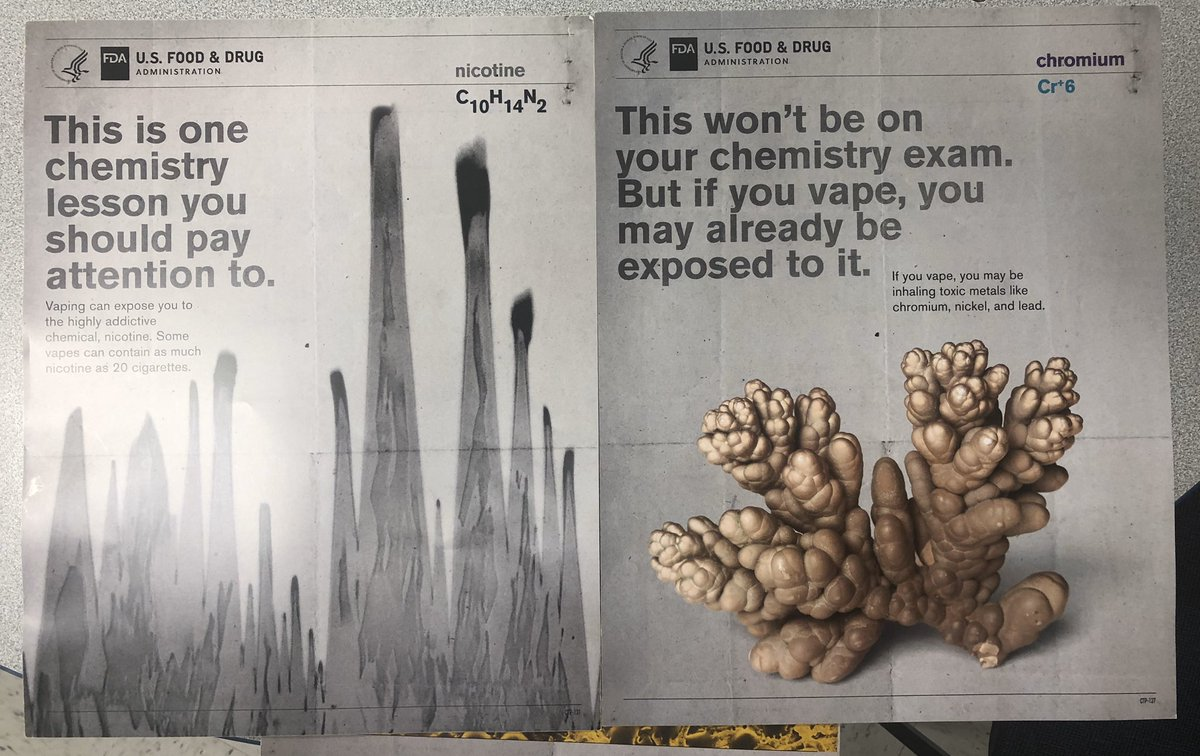



Another note is that #vaping would probably capture the most comprehensive conversation on social media about vaping. However, after initial view of the vaping tweets since 2022, I found that most of the conversation was advocating for vaping using the harmreduction argument. To decrease the amount of time it would take to filter through these arguments, I did not include #vaping for this human evaluation part.

In [1]:
#check Python version Snscrape only works on python version > 3.8
!python -V

Python 3.9.12


In [2]:
#Download snscrape package
!pip3 install --upgrade snscrape

In [3]:
#Import required packages
import os
import pandas as pd

In [6]:
#Scrape tweets with #dontvape

os.system("snscrape --jsonl twitter-hashtag dontvape > dontvape_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('dontvape_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('dontvape_tweets.csv', sep=',', index=False)

In [7]:
#Scrape tweets with #novaping

os.system("snscrape --jsonl twitter-hashtag novaping > novaping_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('novaping_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('novaping_tweets.csv', sep=',', index=False)

In [8]:
#Scrape tweets with #quitvaping

os.system("snscrape --jsonl twitter-hashtag quitvaping > quitvaping_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('quitvaping_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('quitvaping_tweets.csv', sep=',', index=False)

In [9]:
#Scrape tweets with #stopvaping

os.system("snscrape --jsonl twitter-hashtag stopvaping > stopvaping_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('stopvaping_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('stopvaping_tweets.csv', sep=',', index=False)

In [10]:
#Scrape tweets with #vapingkills

os.system("snscrape --jsonl twitter-hashtag vapingkills > vapingkills_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('vapingkills_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('vapingkills_tweets.csv', sep=',', index=False)

In [18]:
#Scrape tweets with #vapingprevention

os.system("snscrape --jsonl twitter-hashtag vapingprevention > vapingprevention_tweets.json")
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('vapingprevention_tweets.json', lines=True)
# Export dataframe into a CSV
tweets_df.to_csv('vapingprevention_tweets.csv', sep=',', index=False)

## Combine csv files

We will now combine the csv files with the scraped tweets. Please make sure not to move the csv files to another folder before completing the process below.

In [19]:
#import modules

import glob
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['vapingprevention_tweets.csv',
 'stopvaping_tweets.csv',
 'novaping_tweets.csv',
 'vapingkills_tweets.csv',
 'dontvape_tweets.csv',
 'quitvaping_tweets.csv']

In [20]:
#create a dataframe that we need to append with data from csv files

combined_file = pd.DataFrame()

#append all files together
for file in csv_files:
            df_file = pd.read_csv(file)
            combined_file = combined_file.append(df_file, ignore_index=True)
combined_file

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,snscrape.modules.twitter.Tweet,https://twitter.com/ProjectBono/status/1600969...,2022-12-08 21:45:25+00:00,Why you should assign Project Bono’s Nicotine ...,Why you should assign Project Bono’s Nicotine ...,1600969823126577153,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,NaN,NaN,NaN,"['YouthVaping', 'VapingPrevention', 'NicotineA...",NaN,NaN,NaN,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/hscambspboro/status/159282...,2022-11-16 10:15:03+00:00,This week we are visiting @GPAPeterborough to ...,This week we are visiting @GPAPeterborough to ...,1592823553652854784,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['vapingprevention', 'smokingprevention', 'vap...",NaN,NaN,NaN,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/NDE_News/status/1588580805...,2022-11-04 17:15:53+00:00,Looking for an evidence-based vaping preventio...,Looking for an evidence-based vaping preventio...,1588580805747830785,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,NaN,NaN,"['VapingPrevention', 'StudentHealth']",NaN,NaN,NaN,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/FairfieldCARES/status/1588...,2022-11-04 01:10:21+00:00,It's #novapenovember - come visit @clearinghou...,It's #novapenovember - come visit @clearinghou...,1588337824457424896,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'i...","['novapenovember', 'vapingprevention', 'quitti...",NaN,NaN,NaN,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/CAREcoalitionAZ/status/158...,2022-10-28 16:30:17+00:00,The fourth blog of October is now live! The my...,The fourth blog of October is now live! The my...,1586032615353556992,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,0,...,NaN,NaN,NaN,NaN,NaN,['VapingPrevention'],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6744,snscrape.modules.twitter.Tweet,https://twitter.com/whyquit_com/status/5013005...,2014-08-18 09:32:14+00:00,"""What did they do to you to make you #quitsmok...","""What did they do to you to make you #quitsmok...",501300527880470530,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,"['quitsmoking', 'quitvaping', 'quitdip', 'quit...",NaN,{'_type': 'snscrape.modules.twitter.PlayerCard...,NaN,NaN
6745,snscrape.modules.twitter.Tweet,https://twitter.com/whyquit_com/status/4904995...,2014-07-19 14:13:11+00:00,How to #quitvaping without relapsing to analog...,How to #quitvaping without relapsing to analog...,490499598205849600,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,NaN,NaN,NaN,NaN,NaN,"['quitvaping', 'vape', 'ecigs', 'vaping', 'sto...",NaN,NaN,NaN,NaN
6746,snscrape.modules.twitter.Tweet,https://twitter.com/whyquit_com/status/4897766...,2014-07-17 14:20:20+00:00,How to #stop #vaping #ecigs without relapse to...,How to #stop #vaping #ecigs without relapse to...,489776619801034752,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,1,...,NaN,NaN,NaN,NaN,NaN,"['stop', 'vaping', 'ecigs', 'analogs', 'ecigar...",NaN,NaN,NaN,NaN
6747,snscrape.modules.twitter.Tweet,https://twitter.com/whyquit_com/status/4745620...,2014-06-05 14:43:11+00:00,"""I've tried everything and nothing works"" - ht...","""I've tried everything and nothing works"" - yo...",474562079324897281,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,"['quitsmoking', 'quitvaping', 'quitsmokeless']",NaN,NaN,NaN,NaN


In [21]:
#save combined file to csv in the data folder

combined_file.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/00_Scraped_messages/scraped_tweets_combined.csv')

## File cleaning

The final step of this is to clean folder with the jupyter notebook scripts and the scrapped files. I did the following:

1. Put Json files into one folder
2. Put .csv files into another folder